<a href="https://colab.research.google.com/github/arihant1224/video_game_sales_with_ratings_eda_project/blob/main/eda_video_games_sales_with_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name: Arihant Jain**<br>
### **Reg. No: 12018540**<br>
### **Roll No: RK20CHA09**<br>
### **Section: K20CH**

In [46]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016 (1).csv


# **Data Preparation and Cleaning**

In [47]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

videogame_df = pd.read_csv(io.BytesIO(uploaded['Video_Games_Sales_as_at_22_Dec_2016.csv']))
videogame_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
videogame_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
videogame_df.shape

(16719, 16)

In [6]:
videogame_df.sort_values(by = ['Name']).head(30)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14985,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60,NaN,NaN,NaN,NaN,NaN,NaN
13795,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
2454,Tales of Xillia 2,PS3,2012.0,Role-Playing,Namco Bandai Games,0.20,0.12,0.45,0.07,0.84,71.0,59.0,7.9,216.0,Bandai Namco Games,T
4728,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41,NaN,NaN,NaN,NaN,NaN,NaN
8343,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN
7088,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN
8598,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
videogame_df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
videogame_df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,tbd,NaN,Atari,T
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
videogame_df[50:60]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
50,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18,NaN,NaN,NaN,NaN,NaN,NaN
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M
52,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,96.0,16.0,8.7,138.0,Polyphony Digital,E
53,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,3.00,2.14,0.78,10.81,90.0,82.0,8.4,921.0,Nintendo,E
54,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.82,0.81,2.11,10.70,84.0,82.0,7.5,1112.0,Polyphony Digital,E
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.64,0.38,1.60,10.60,94.0,67.0,6.3,2073.0,Infinity Ward,M
56,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,NaN,NaN,NaN,NaN,NaN,NaN
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,NaN,NaN,NaN,NaN,NaN,NaN
59,Super Mario 64,DS,2004.0,Platform,Nintendo,5.01,3.07,1.25,0.97,10.30,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for col in videogame_df.columns:
    print(col)

Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
Rating


In [11]:
#finding all Names but only UNIQUE.
x = videogame_df['Name'].unique() 
y = videogame_df['Genre'].unique()
z = videogame_df['Publisher'].unique()

In [12]:
print('Total Games by `Name` count(unique) :',len(x))
print('Total Games by `Genre` count(unique) :',len(y))
print('Total Games by `Publisher` count(unique) :',len(z))

Total Games by `Name` count(unique) : 11563
Total Games by `Genre` count(unique) : 13
Total Games by `Publisher` count(unique) : 582


In [66]:
videogame_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [65]:
(videogame_df.isnull().sum()/videogame_df.shape[0])*100

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score        0.000000
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


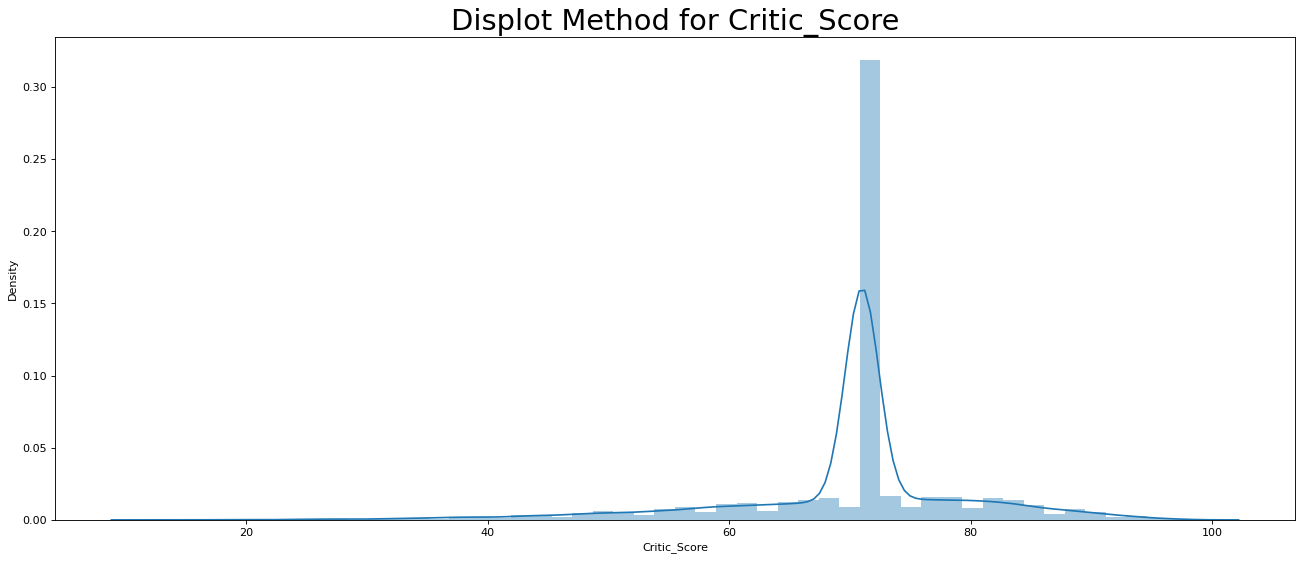

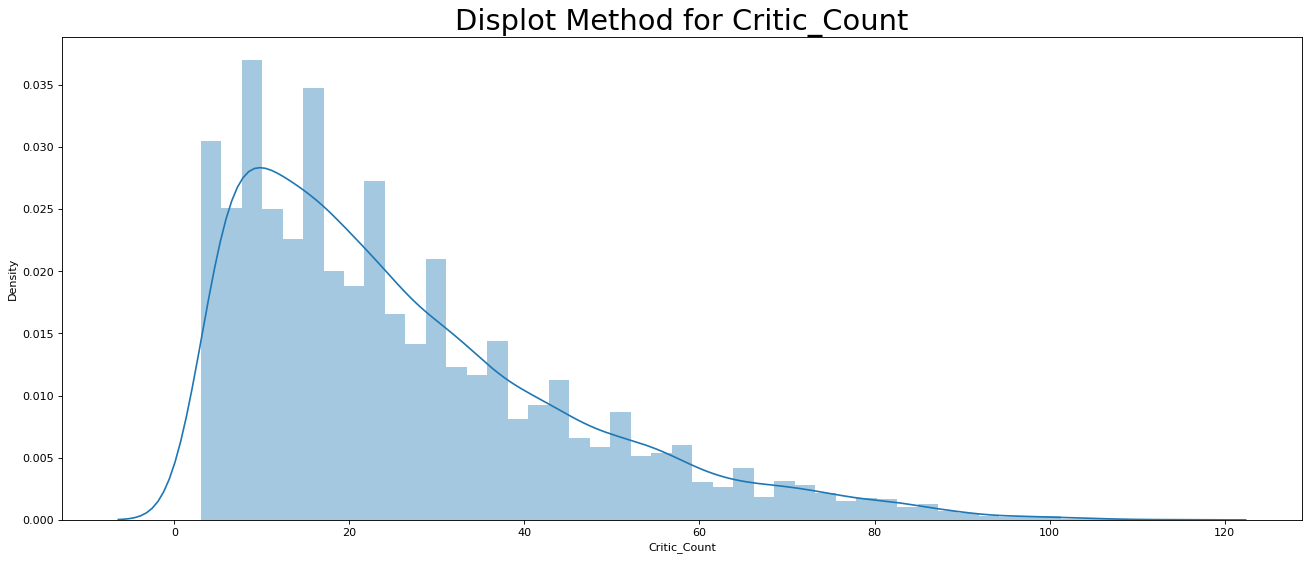

In [68]:
df_name = ['Critic_Score','Critic_Count']
j = 0
df_lst = [videogame_df.Critic_Score,
          videogame_df.Critic_Count]

for i in df_lst:
    plt.figure(figsize=(20,8), dpi= 80)
    sns.distplot(i)
    plt.title('Displot Method for '+str(df_name[j]), fontdict={'fontsize':26})
    j += 1

#these columns are skewed thats why I am imputting missing values via median

In [69]:
videogame_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,70.010886,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,9.776336,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,71.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,71.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [70]:
videogame_df['Critic_Score'].median()

71.0

In [71]:
videogame_df['Critic_Score'].fillna(videogame_df['Critic_Score'].median(), inplace = True)

In [63]:
videogame_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,70.010886,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,9.776336,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,71.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,71.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000
